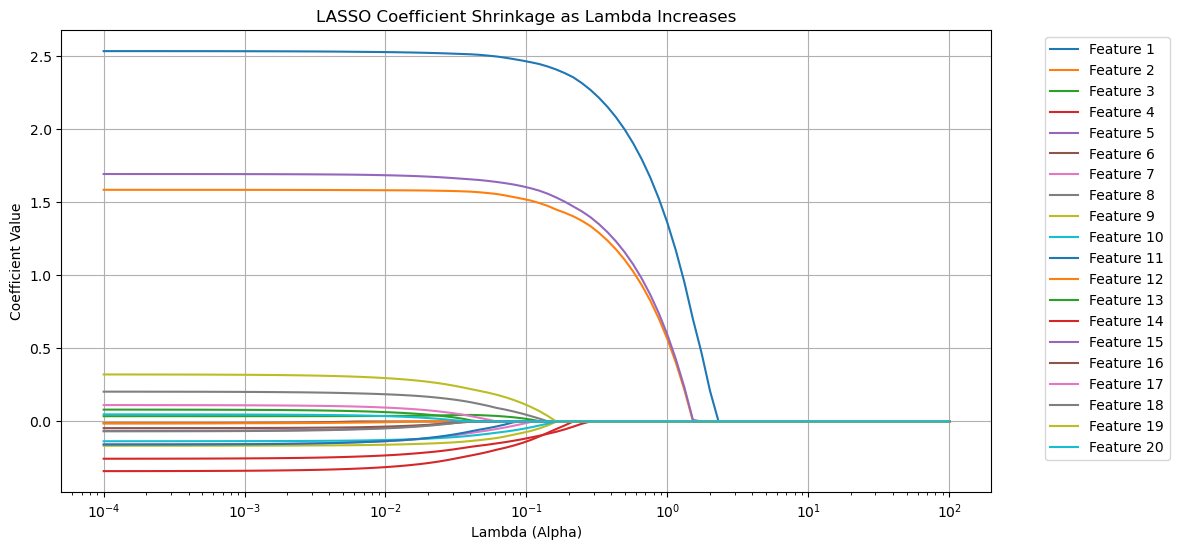

Best lambda (alpha): 0.21544346900318845
Test MSE with best lambda: 2.7495273553687527
True Coefficients: [3.  1.5 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
Estimated Coefficients: [ 2.35482928  1.40354557  0.         -0.03521765  1.47094899  0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.          0.
  0.          0.        ]


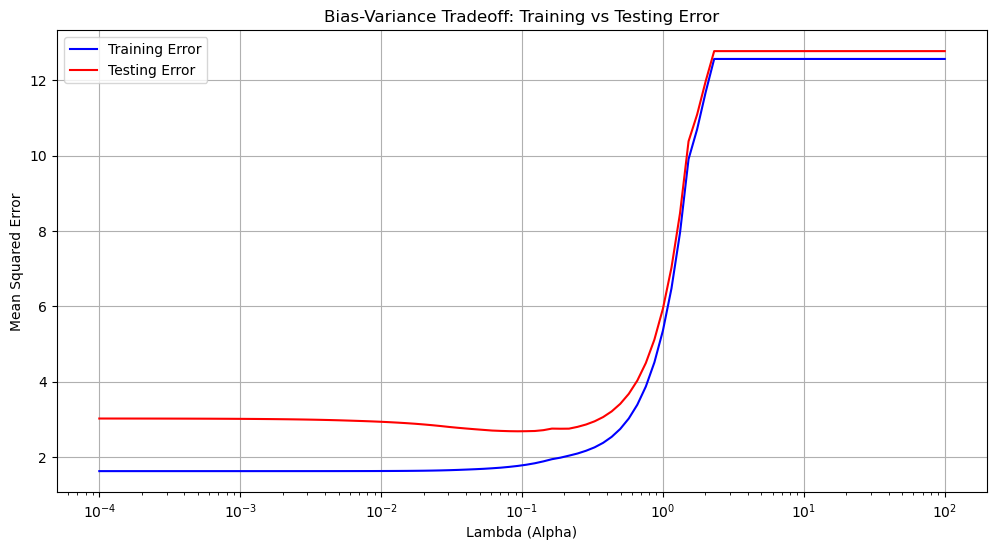

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42) # Seed for reproducibility
n_samples = 100 # Number of samples
n_features = 20 # Number of features

# True coefficients 
true_coef = np.array([3, 1.5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) #Defines true cofficients for the features. 

# Generate feature matrix X
X = np.random.randn(n_samples, n_features)

# Generate target y (with some noise)
y = X @ true_coef + np.random.randn(n_samples) * 1.5 #Generate the target variable y ( X @ true_coef) + Gaussian nose (np.random.randn(n_samples) * 1.5) 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for regularization)
scaler = StandardScaler() # Standardize features (important for regularization) which makes mean = 0 and variance = 1 for each feature. This is important for LASSO regression.
X_train = scaler.fit_transform(X_train) # Fit the scaler to the training data and transform the training data
X_test = scaler.transform(X_test)  # Applies the same transformation to the test data

# Define a range of lambda (alpha) values
alphas = np.logspace(-4, 2, 100)  # From 0.0001 to 100 

# Store results
coefficients = []

# Train LASSO models for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000) # Lasso regression model with alpha as the regularization parameter
    lasso.fit(X_train, y_train) # Fit the model to the training data
    coefficients.append(lasso.coef_) # Retrieves the cofficients of the trained model and appends them to the coffiecent list

# Plot coefficient shrinkage
plt.figure(figsize=(12, 6))
for i in range(n_features):
    plt.semilogx(alphas, [coef[i] for coef in coefficients], label=f'Feature {i+1}')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('Coefficient Value')
plt.title('LASSO Coefficient Shrinkage as Lambda Increases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Perform grid search with cross-validation
param_grid = {'alpha': alphas} # Specifies the range of lambda values to test
lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error') # Performs a grid search with 5-fold cross-validation to find the best lambda value
grid_search.fit(X_train, y_train) # Fits the grid search on the training data

# Best lambda value
best_alpha = grid_search.best_params_['alpha'] # Retrieves the best lambda value from the grid search
print(f'Best lambda (alpha): {best_alpha}') # Prints the best lambda value

# Train the final model with the best lambda
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = best_lasso.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE with best lambda: {test_mse}')

# Print coefficients
print('True Coefficients:', true_coef)
print('Estimated Coefficients:', best_lasso.coef_) 

# Store results
train_errors = []
test_errors = []

# Train LASSO models for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    # Calculate mean squared error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot training and testing errors
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, train_errors, label='Training Error', color='blue')
plt.semilogx(alphas, test_errors, label='Testing Error', color='red')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff: Training vs Testing Error')
plt.legend()
plt.grid()
plt.show()



Best alpha: 0.0007054802310718645
Test MSE: 0.5548886133286782
Test R²: 0.5765531047615655


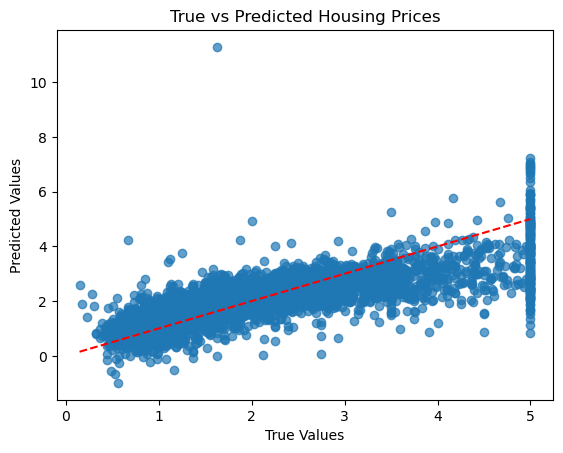

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define alpha (lambda) range
alphas = np.logspace(-4, 2, 100)

# Grid search with cross-validation
lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Train final model
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso.fit(X_train, y_train)

# Predict on test set
y_test_pred = best_lasso.predict(X_test)

# Evaluate
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')

# Plot true vs predicted
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Housing Prices')
plt.show()
